In [1]:
%load_ext autoreload
%autoreload 2
%autosave 0

Autosave disabled


In [2]:
from etl import ErgastTables, show

In [4]:
tables = ErgastTables()
print(tables)
tables.names

ErgastTables(path=/context/data/etl/ergastf1.zip)


('circuits',
 'constructor_results',
 'constructors',
 'constructor_standings',
 'driver',
 'driver_standings',
 'lap_times',
 'pit_stops',
 'qualifying',
 'races',
 'results',
 'seasons',
 'status')

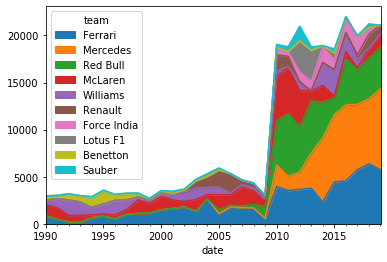

In [24]:
data = (
    tables
    .team_standings
    .set_index('team_id').join(tables.teams['team'])
    .set_index('race_id').join(tables.races[['date','race']])
    .groupby(['date', 'team'])['points'].sum().unstack('team')
    .loc['1990':].dropna(axis=1, how='all').fillna(0)
    .resample('y').sum()
    )

top10 = data.sum().nlargest(10).index
data[top10].plot.area()